In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-data/Salary_Data.csv
/kaggle/input/startup-logistic-regression/50_Startups.csv


In [2]:
# import all the lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# read the dataset using pandas
data = pd.read_csv('/kaggle/input/salary-data/Salary_Data.csv')

In [4]:
# This displays the top 5 rows of the data
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 56.4 MB/s eta 0:00:0000:0100:01
  Using cached importlib_metadata-6.1.0-py3-none-any.whl (21 kB)
     ━━━━━━━━━

In [7]:
from pycaret.regression import *

In [8]:
exp_reg101 = setup(data = data, target = 'Salary', session_id=123) 

,Description,Value
0,Session id,123
1,Target,Salary
2,Target type,Regression
3,Original data shape,"(30, 2)"
4,Transformed data shape,"(30, 2)"
5,Transformed train set shape,"(21, 2)"
6,Transformed test set shape,"(9, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [9]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,6537.5688,65236203.2033,7106.6115,-0.1667,0.0990,0.0906,0.4470
ada,AdaBoost Regressor,5908.3992,58972832.5198,6480.4835,-0.1874,0.0900,0.0810,0.0800
rf,Random Forest Regressor,5912.1757,53640669.3779,6382.2053,-0.2045,0.0910,0.0822,0.1950
gbr,Gradient Boosting Regressor,6853.1490,70119777.3871,7408.7922,-0.3123,0.1040,0.0955,0.0620
dt,Decision Tree Regressor,6965.4167,72234796.7167,7533.3385,-0.3664,0.1060,0.0974,0.0280
xgboost,Extreme Gradient Boosting,7105.2538,73751117.8000,7719.2193,-0.6176,0.1086,0.0997,0.2260
et,Extra Trees Regressor,7271.4632,70195470.0009,7670.8405,-0.7533,0.1169,0.1062,0.1760
en,Elastic Net,5492.5436,42599838.6500,5868.5932,-1.0157,0.0918,0.0858,0.0320
huber,Huber Regressor,5437.3086,43522643.0517,5826.0155,-1.2588,0.0937,0.0860,0.0280
ridge,Ridge Regression,5337.6189,42464416.8938,5703.8124,-1.2609,0.0915,0.0844,0.0280


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

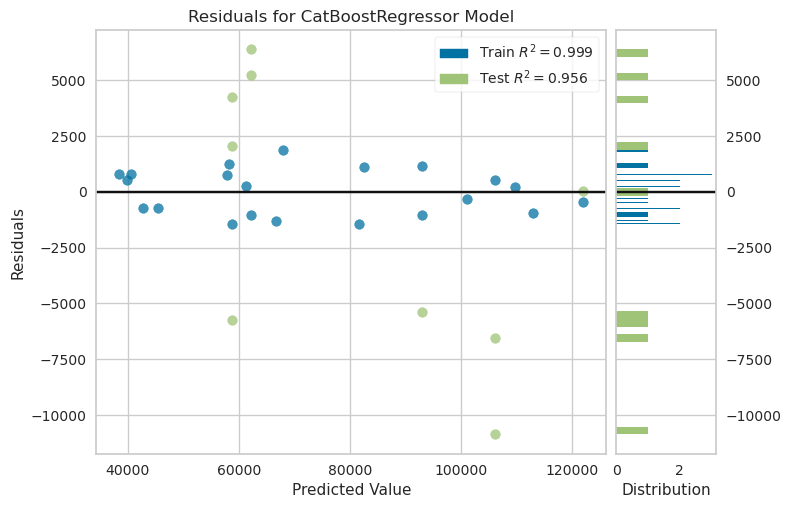

In [10]:
# plot residuals
plot_model(best, plot = 'residuals')

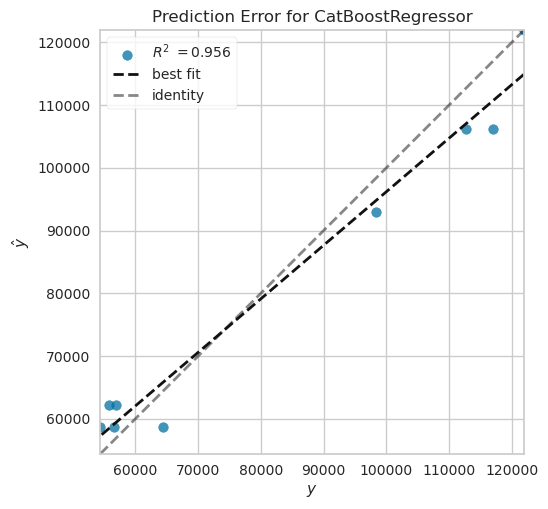

In [11]:
# plot error
plot_model(best, plot = 'error')

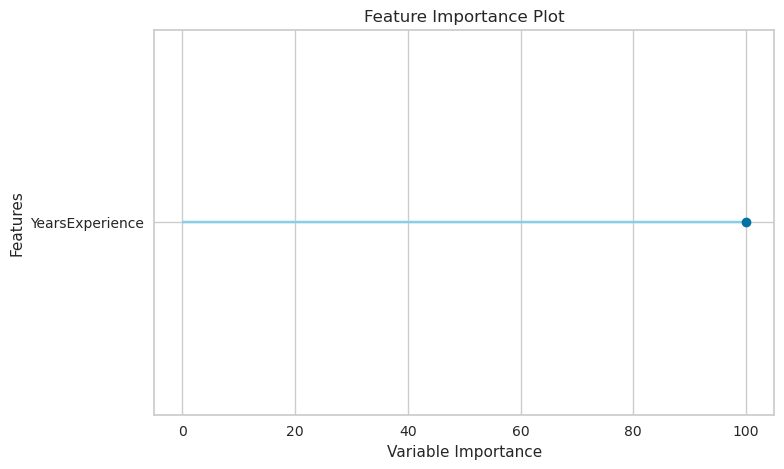

In [12]:
# plot feature importance
plot_model(best, plot = 'feature')

In [13]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['YearsExperience'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x7fa58ef76a10>)]),
 'my_first_pipeline.pkl')

In [15]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['YearsExperience'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7fa578f6c250>)])

In [16]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6203.3086,60181452.0000,7757.6704,0.9342,0.1148,0.0945
1,922.8672,868589.8750,931.9817,0.9992,0.0177,0.0157
2,8580.3008,73793480.0000,8590.3135,-11.2040,0.1266,0.1349
3,2464.4961,7759021.5000,2785.5020,0.9740,0.0460,0.0393
4,6182.7734,39832552.0000,6311.3037,0.8876,0.0690,0.0715
5,8489.9551,77970248.0000,8830.0762,-5.6235,0.2243,0.1952
6,408.6035,193252.1094,439.6045,0.9995,0.0066,0.0057
7,10040.6172,105218320.0000,10257.5986,-2.5738,0.1209,0.1124
8,4589.9004,25396162.0000,5039.4604,0.9738,0.0843,0.0657


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6203.3086,60181452.0000,7757.6704,0.9342,0.1148,0.0945
1,922.8672,868589.8750,931.9817,0.9992,0.0177,0.0157
2,8580.3008,73793480.0000,8590.3135,-11.2040,0.1266,0.1349
3,2464.4961,7759021.5000,2785.5020,0.9740,0.0460,0.0393
4,6182.7734,39832552.0000,6311.3037,0.8876,0.0690,0.0715
5,8489.9551,77970248.0000,8830.0762,-5.6235,0.2243,0.1952
6,408.6035,193252.1094,439.6045,0.9995,0.0066,0.0057
7,10040.6172,105218320.0000,10257.5986,-2.5738,0.1209,0.1124
8,4589.9004,25396162.0000,5039.4604,0.9738,0.0843,0.0657


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [18]:
print(tuned_lr)

LinearRegression(n_jobs=-1)


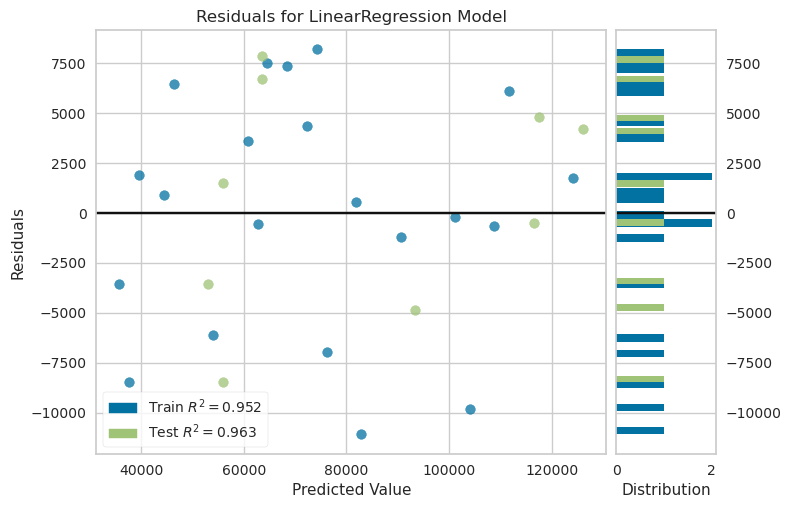

In [19]:
plot_model(tuned_lr)

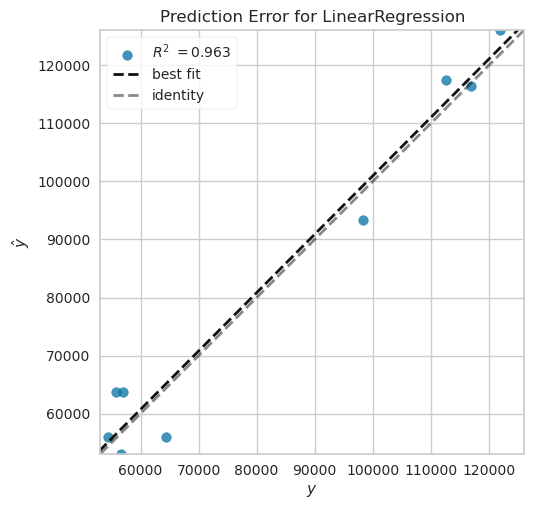

In [20]:
plot_model(tuned_lr, plot = 'error')

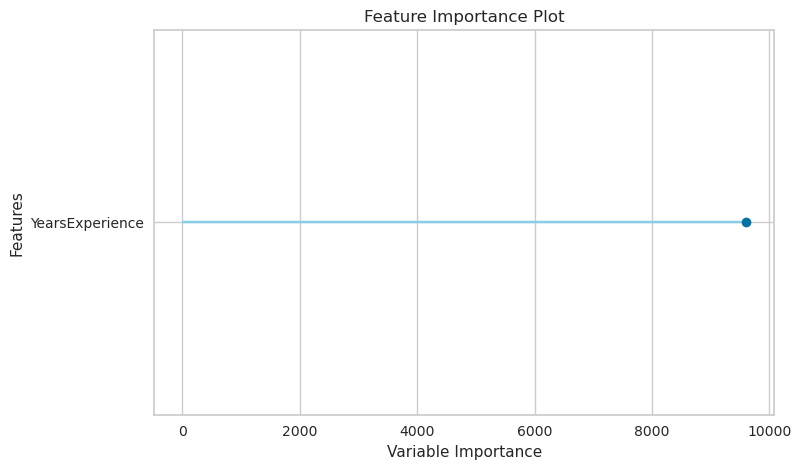

In [21]:
plot_model(tuned_lr, plot = 'feature')

In [22]:
predict_model(tuned_lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,4715.9614,28625076.0000,5350.2407,0.9634,0.0817,0.0679


,YearsExperience,Salary,prediction_label
7,3.2,54445.0,55963.820312
29,10.5,121872.0,126062.515625
5,2.9,56642.0,53083.050781
26,9.5,116969.0,116459.953125
8,3.2,64445.0,55963.820312
27,9.6,112635.0,117420.218750
12,4.0,56957.0,63645.867188
21,7.1,98273.0,93413.812500
11,4.0,55794.0,63645.867188


In [23]:
final_lr = finalize_model(tuned_lr)
print(final_lr)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['YearsExperience'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator', LinearRegression(n_jobs=-1))])


In [24]:
predict_model(final_lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,4631.9863,27321376.0000,5226.9854,0.9651,0.0808,0.0671


,YearsExperience,Salary,prediction_label
7,3.2,54445.0,56032.070312
29,10.5,121872.0,125016.812500
5,2.9,56642.0,53197.082031
26,9.5,116969.0,115566.843750
8,3.2,64445.0,56032.070312
27,9.6,112635.0,116511.843750
12,4.0,56957.0,63592.042969
21,7.1,98273.0,92886.937500
11,4.0,55794.0,63592.042969


In [25]:
# read the dataset using pandas
data = pd.read_csv('/kaggle/input/startup-logistic-regression/50_Startups.csv')

In [26]:
data.head

<bound method NDFrame.head of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  

In [27]:
new_data = data.copy()
new_data.drop('State', axis=1, inplace=True)
new_data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [28]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(new_data, target = 'Profit', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Profit
2,Target type,Regression
3,Original data shape,"(50, 4)"
4,Transformed data shape,"(50, 4)"
5,Transformed train set shape,"(35, 4)"
6,Transformed test set shape,"(15, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [29]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,7416.7435,132475394.6700,8944.8728,0.8959,0.1596,0.1436,0.3310
br,Bayesian Ridge,7759.7853,117731002.5129,9473.9148,0.8562,0.1525,0.1384,0.0710
llar,Lasso Least Angle Regression,7733.1957,116903063.1000,9467.8001,0.8539,0.1531,0.1380,0.0640
lr,Linear Regression,7734.5368,116932547.5000,9469.4244,0.8538,0.1532,0.1380,0.0650
lasso,Lasso Regression,7734.5355,116932520.4000,9469.4241,0.8538,0.1532,0.1380,0.0720
ridge,Ridge Regression,7734.5360,116932559.2500,9469.4257,0.8538,0.1532,0.1380,0.0610
en,Elastic Net,7734.5358,116932553.7000,9469.4245,0.8538,0.1532,0.1380,0.0630
lar,Least Angle Regression,7734.5378,116932527.0000,9469.4249,0.8538,0.1532,0.1380,0.0650
omp,Orthogonal Matching Pursuit,7836.8957,118391998.7679,9380.0820,0.8393,0.1528,0.1394,0.0690
catboost,CatBoost Regressor,10644.9219,237777225.3716,12447.1728,0.8196,0.1974,0.1968,0.5420


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

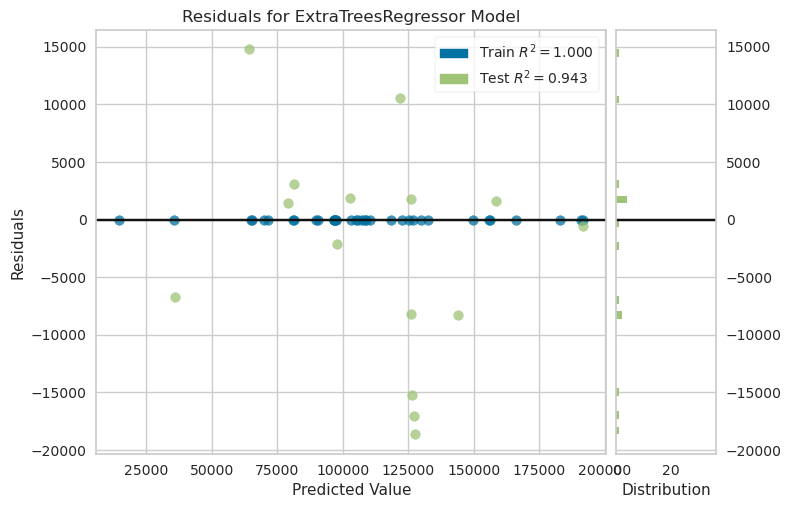

In [30]:
# plot residuals
plot_model(best, plot = 'residuals')

In [31]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16127.1055,450929952.0000,21235.1113,0.8983,0.6529,0.7166
1,6481.3008,75617000.0000,8695.8037,0.5822,0.0687,0.0557
2,6090.3154,66785576.0000,8172.2441,0.9647,0.1804,0.1262
3,4045.4473,35578424.0000,5964.7651,0.9837,0.0344,0.0251
4,14006.9385,204340288.0000,14294.7646,0.6963,0.1546,0.1404
5,3255.9739,13691265.0000,3700.1709,0.8861,0.0371,0.0336
6,1675.0573,4884650.0000,2210.1245,0.9921,0.0155,0.0129
7,6756.0444,75525464.0000,8690.5391,0.8417,0.0753,0.0573
8,8335.9658,83787080.0000,9153.5283,0.7494,0.1152,0.0911


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

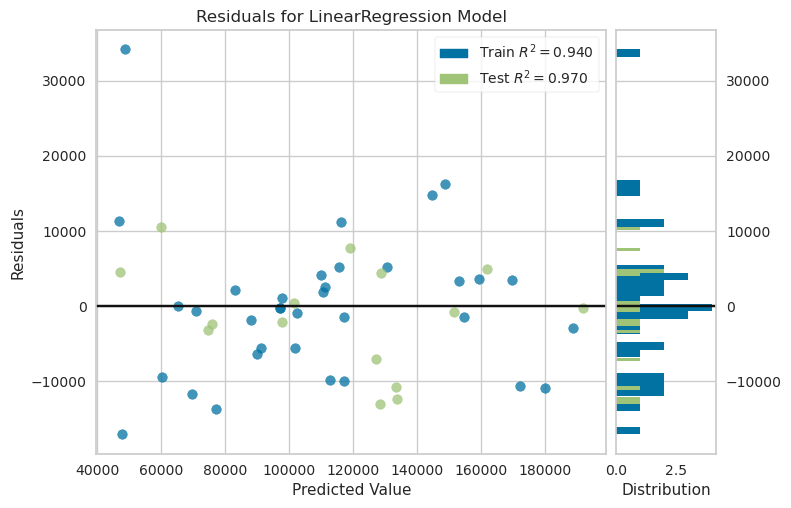

In [32]:
# plot residuals
plot_model(lr, plot = 'residuals')

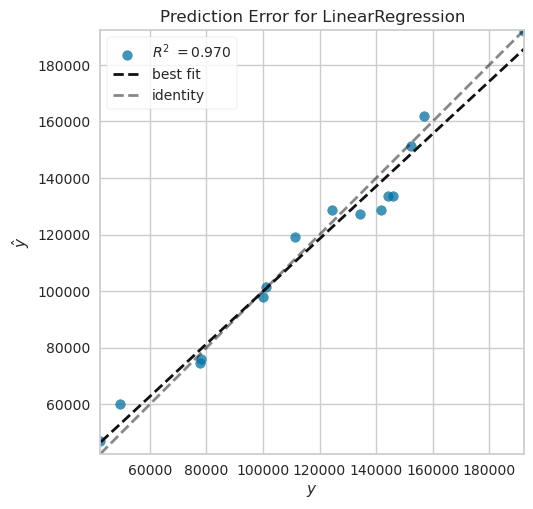

In [33]:
# plot error
plot_model(lr, plot = 'error')

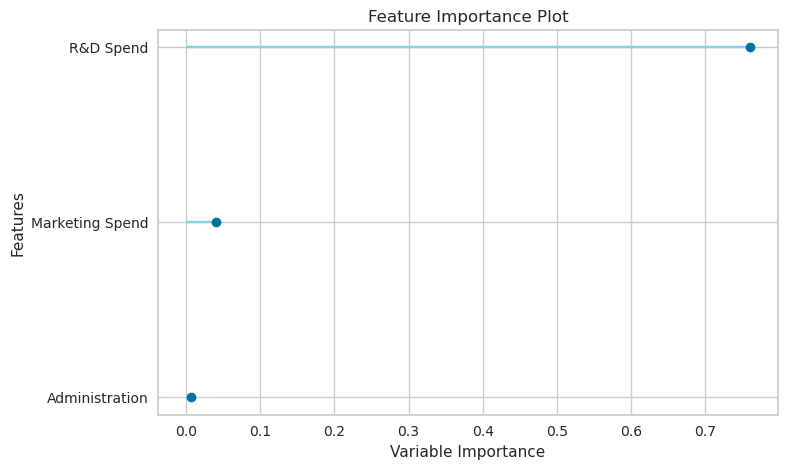

In [34]:
# plot feature importance
plot_model(lr, plot = 'feature')

In [35]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [36]:
data_test=new_data.tail()
data_test

,R&D Spend,Administration,Marketing Spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [37]:
data_test.drop('Profit', axis=1, inplace=True)
data_test.head()

,R&D Spend,Administration,Marketing Spend
45,1000.23,124153.04,1903.93
46,1315.46,115816.21,297114.46
47,0.00,135426.92,0.00
48,542.05,51743.15,0.00
49,0.00,116983.80,45173.06


In [38]:
unseen_predictions = predict_model(lr, data=data_test)
unseen_predictions.head()

,R&D Spend,Administration,Marketing Spend,prediction_label
45,1000.229980,124153.039062,1903.930054,47856.839844
46,1315.459961,115816.210938,297114.468750,60067.398438
47,0.000000,135426.921875,0.000000,47093.687500
48,542.049988,51743.148438,0.000000,46951.945312
49,0.000000,116983.796875,45173.058594,48811.894531


In [39]:
new_data.tail()

,R&D Spend,Administration,Marketing Spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40
